In [2]:
import numpy as np
import sys
from matplotlib import pyplot as plt

### Problem 1
<font size = 4 color = black face = "Times New Roman">
    
This problem can be divided into two parts:
1. Solve the following ordinary differential equations with initial-value problem.
$$
    \begin{aligned}
    \frac{dr}{dt}&=2r -\alpha rf, \;r(0) = r_0,\\
    \frac{df}{dt}&=-f + \alpha rf, \;f (0) = f_0\end{aligned} 
    $$  
Here, we use **the rk4 method** to solve the differential equations.
    
2. Find $t_p$, which satisified 
 $$
    \begin{aligned}
    r(t + t_p) = r(t), \;f (t + t_p) = f (t)
    \end{aligned}
    $$
Though the defination for $t_p$ is the time when both populations return to their original values, since the solution itself is peridoic, we can use the time difference of neighbouring maximum values of $r(t)$ or $f(t)$
As for this part, we use the **the slope between two neighbouring points, once the slope becomes 0 or the slope changes its the sign from positive to negative, we treat this point as the maximum value**, in all the three problems, we choose $f(t)$ as our target.

In [3]:
# Define the function to find tp
def tp_finder(f,t,sectionA,sectionB,t_step = 0.01): 
# f is the value of f(t), sectionA and sectionB  corresponds to the range of the location of two neighbouring maximization.
# Assume t starts from 0 with step size t_step, f(t) and t corresponds to each other.    
# The input of sectionA(B) should take the form [1,2]   
    a,b = sectionA
    c,d = sectionB
    slope_last = 0
    for i_a in range(int(a/0.01),int(b/0.01)):
        slope = (f[i_a+1]-f[i_a])/0.01
        if slope == 0 or slope*slope_last < 0:
            t_a = t[i_a]
            break
        slope_last = slope
    for i_b in range(int(c/0.01),int(d/0.01)):
        slope = (f[i_b+1]-f[i_b])/0.01
        if slope == 0 or slope*slope_last < 0:
            t_b = t[i_b]
            break
        slope_last = slope   
    tp = abs(t_a-t_b)   
    return tp

In [4]:
# Derive drive function
def f(rf,t,alpha=0.01):
    r,f = rf
    r_n = 2*r-alpha*r*f
    f_n = -f+alpha*r*f
    return np.array([r_n,f_n])

<font size = 4 color = black face = "Times New Roman">
(1)     

In [5]:
dt = 0.01
t = np.arange(0, 5*np.pi+dt, dt)
y = np.zeros((len(t),2))
y0  = np.array([300,150])

In [6]:
y[0] = y0
for n in range(0, len(t) - 1):
    k1 = np.array(f(y[n], t[n]))
    k2 = np.array(f(y[n] + 0.5*dt*k1, t[n] + 0.5*dt))
    k3 = np.array(f(y[n] + 0.5*dt*k2, t[n] + 0.5*dt))
    k4 = np.array(f(y[n] + dt*k3, t[n] + dt))
    y[n+1] = y[n] + dt * (k1 +  2 * k2 + 2 * k3 + k4)/6

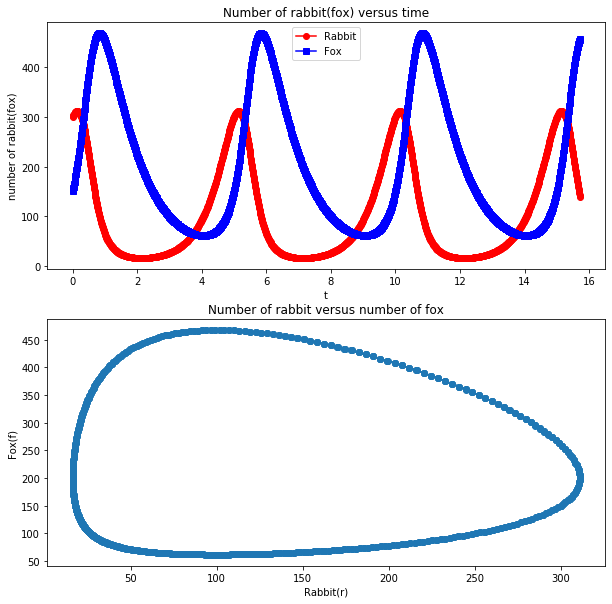

In [7]:
fig, ax = plt.subplots(2,1,figsize=(10,10))
rabbit =ax[0].plot(t,y[:,0],'ro-',label = 'Rabbit')
fox = ax[0].plot(t,y[:,1],'-bs',label = 'Fox')
ax[0].set_xlabel('t')
ax[0].set_ylabel('number of rabbit(fox)')
ax[0].set_title('Number of rabbit(fox) versus time')
ax[0].legend()

ax[1].plot(y[:,0],y[:,1],'-o')
ax[1].set_xlabel('Rabbit(r)')
ax[1].set_ylabel('Fox(f)')
ax[1].set_title('Number of rabbit versus number of fox')
plt.show()

<font size = 4 color = black face = "Times New Roman">
From the plots above we can find that the neighbouring maximum value of the number of the fox(choose the first two values) lie in the section $[0,2]$ and $[5,7]$. 

In [8]:
# Use the solution to the number of fox
tp_finder(y[:,1],t,[0,2],[5,7]) 

5.0

<font size = 4 color = black face = "Times New Roman"> We can find that the period $t_p \approx 5$ in this case, which is the value shown in this problem.

(2)

In [9]:
dt = 0.01
t = np.arange(0, 5*np.pi+dt, dt)
y = np.zeros((len(t),2))
y0  = np.array([15,22])

In [10]:
y[0] = y0
for n in range(0, len(t) - 1):
    k1 = np.array(f(y[n], t[n]))
    k2 = np.array(f(y[n] + 0.5*dt*k1, t[n] + 0.5*dt))
    k3 = np.array(f(y[n] + 0.5*dt*k2, t[n] + 0.5*dt))
    k4 = np.array(f(y[n] + dt*k3, t[n] + dt))
    y[n+1] = y[n] + dt * (k1 +  2 * k2 + 2 * k3 + k4)/6

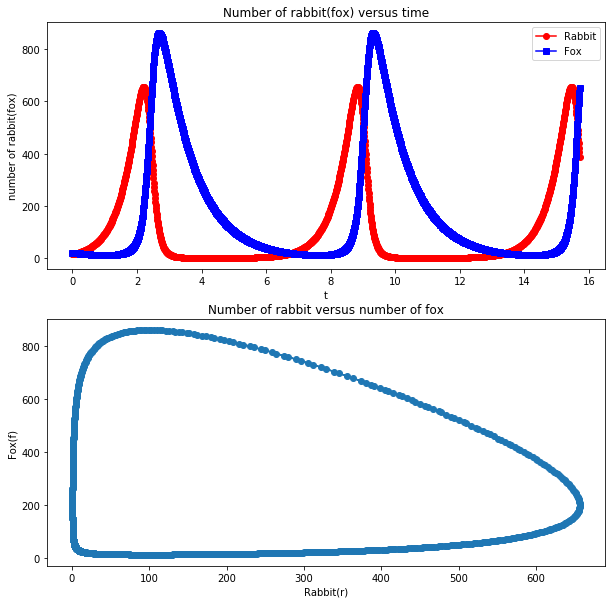

In [11]:
fig, ax = plt.subplots(2,1,figsize=(10,10))
rabbit =ax[0].plot(t,y[:,0],'ro-',label = 'Rabbit')
fox = ax[0].plot(t,y[:,1],'-bs',label = 'Fox')
ax[0].set_xlabel('t')
ax[0].set_ylabel('number of rabbit(fox)')
ax[0].set_title('Number of rabbit(fox) versus time')
ax[0].legend()

ax[1].plot(y[:,0],y[:,1],'-o')
ax[1].set_xlabel('Rabbit(r)')
ax[1].set_ylabel('Fox(f)')
ax[1].set_title('Number of rabbit versus number of fox')
plt.show()

<font size = 4 color = black face = "Times New Roman">
From the plots above we can find that the neighbouring maximum value of the number of the fox(choose the first two values) lie in the section $[2,4]$ and $[4,8]$. 

In [12]:
# Use the solution to the number of fox
tp_finder(y[:,1],t,[0,4],[4,8]) 

6.62

<font size = 4 color = black face = "Times New Roman"> We can find that the period $t_p \approx 6.62$ in this case, which is the value shown in this problem.

<font size = 4 color = black face = "Times New Roman"> (3)

In [13]:
dt = 0.01
t = np.arange(0, 5*np.pi+dt, dt)
y = np.zeros((len(t),2))
y0  = np.array([102,198])

In [14]:
y[0] = y0
for n in range(0, len(t) - 1):
    k1 = np.array(f(y[n], t[n]))
    k2 = np.array(f(y[n] + 0.5*dt*k1, t[n] + 0.5*dt))
    k3 = np.array(f(y[n] + 0.5*dt*k2, t[n] + 0.5*dt))
    k4 = np.array(f(y[n] + dt*k3, t[n] + dt))
    y[n+1] = y[n] + dt * (k1 +  2 * k2 + 2 * k3 + k4)/6

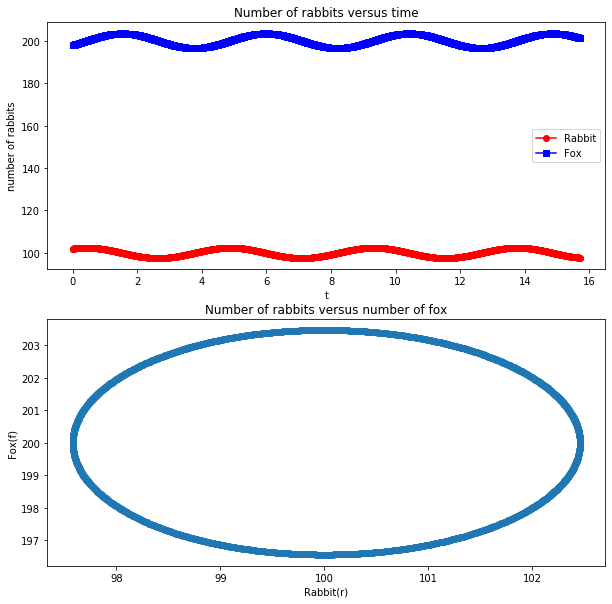

In [15]:
fig, ax = plt.subplots(2,1,figsize=(10,10))
rabbit =ax[0].plot(t,y[:,0],'ro-',label = 'Rabbit')
fox = ax[0].plot(t,y[:,1],'-bs',label = 'Fox')
ax[0].set_xlabel('t')
ax[0].set_ylabel('number of rabbits')
ax[0].set_title('Number of rabbits versus time')
ax[0].legend()

ax[1].plot(y[:,0],y[:,1],'-o')
ax[1].set_xlabel('Rabbit(r)')
ax[1].set_ylabel('Fox(f)')
ax[1].set_title('Number of rabbits versus number of fox')
plt.show()

<font size = 4 color = black face = "Times New Roman">
    
From the plots above we can find that the neighbouring maximum value of the number of the fox(choose the **second and third** two values) lie in the section $[0,4]$ and $[4,8]$. 

In [16]:
# Use the solution to the number of fox
tp_finder(y[:,1],t,[0,4],[4,8]) 

4.44

<font size = 4 color = black face = "Times New Roman"> We can find that the period $t_p \approx 4.44$ in this case.